## Categorise the countries using socio-economic and health factors and get those which are in direst need of aid

### Load the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
dataset = pd.read_csv(r'C:\Users\hp\Downloads\Country-data.csv')
df = dataset

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.shape

(167, 10)

Check for missing values

In [7]:
# Checking for null values
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
# Country column is unique for every sample observation
df['country'].nunique(), df.shape[0]

(167, 167)

In [9]:
# Set the 'country' column as index
df.set_index('country', inplace= True)

In [10]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


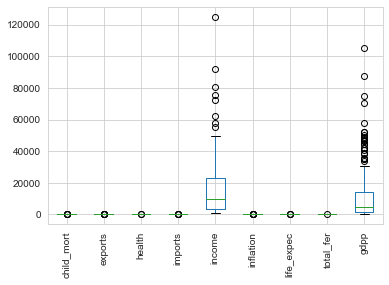

In [11]:
# Check for outliers
df.boxplot()
plt.xticks(rotation= 90)
plt.show()

Data need to be scaled otherwise 'income' and 'gdp' might dominate others while training.

### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df)
scaled.shape

(167, 9)

In [15]:
df_scaled = pd.DataFrame(scaled, index= df.index, columns= df.columns)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


Let's see the pairplot in order to check for distinguishable clusters.

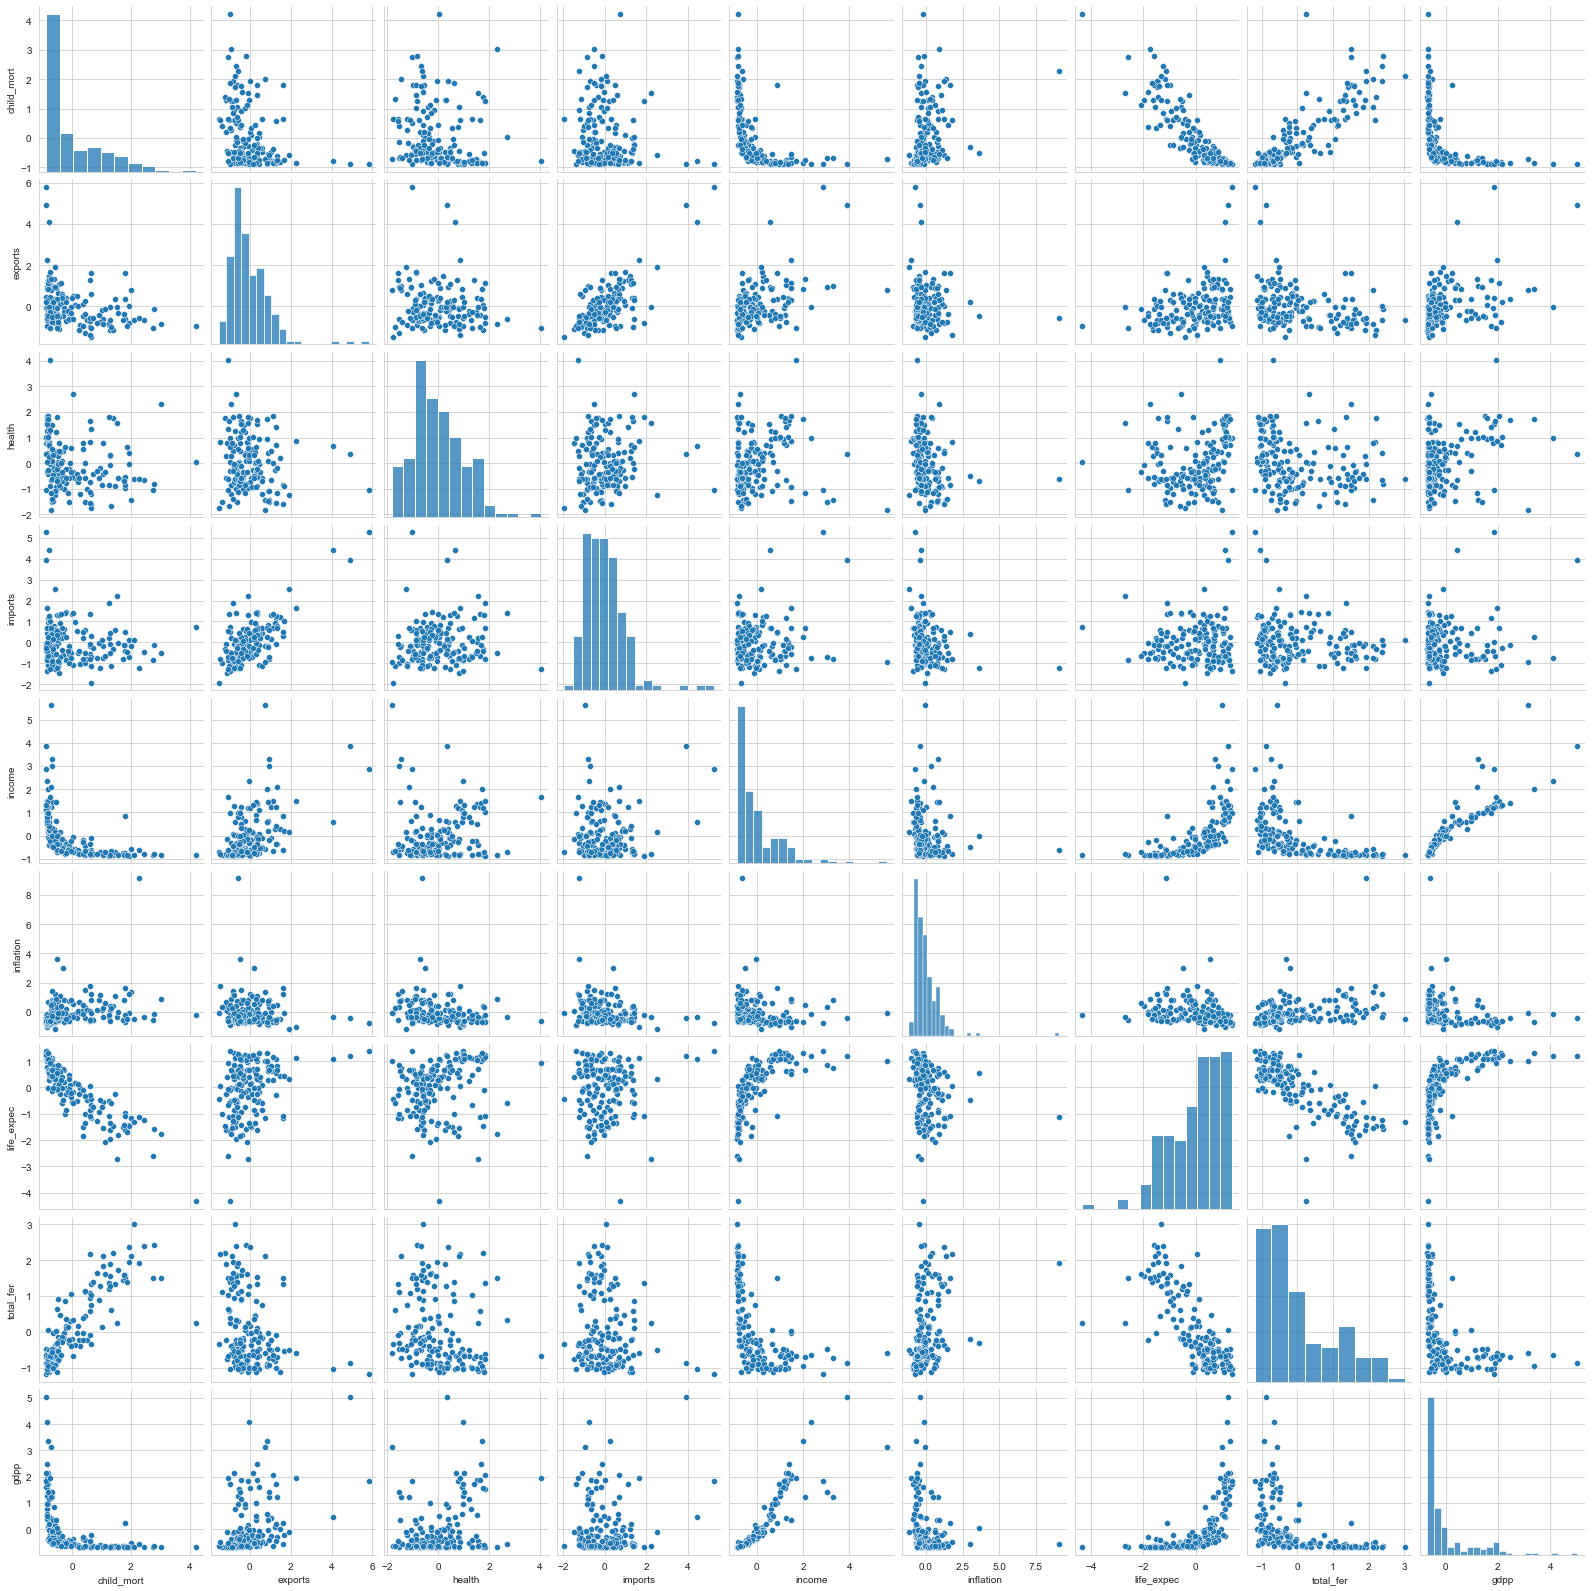

In [16]:
# Visualize pairplot
sns.pairplot(df_scaled)

Couldn't get much from above plot, let's check for t-SNE plot.

### t-SNE Implementation

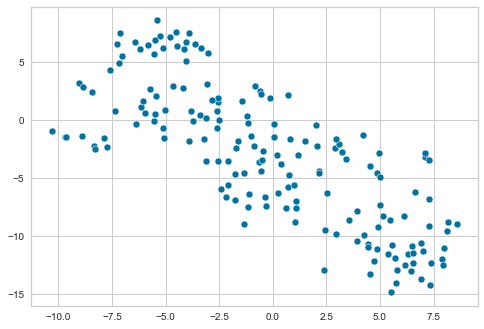

In [23]:
from sklearn.manifold import TSNE

# Instantiate TSNE
tsne = TSNE(learning_rate= 100)
# Transform dataset
transformed = tsne.fit_transform(df_scaled)

# Transformed features
xs = transformed[:,0]
ys = transformed[:,1]

# Visualize dimensionally reduced dataset
sns.scatterplot(x= xs, y= ys)
plt.show()

From the above plot, roughly 2 or preferably 3 cluster can be seen.

### Inertia plot - to check number of optimum clusters

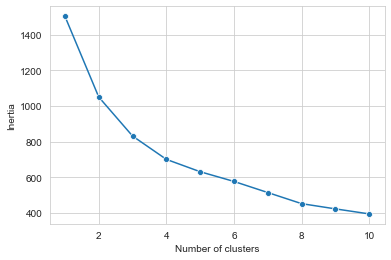

In [17]:
# Cross checking for number of clusters using inertia plot

from sklearn.cluster import KMeans
lst = []
for i in range(10):
    kmeans = KMeans(n_clusters = i+1)
    kmeans.fit(df_scaled)
    
    # inertia measures the spread of the clusters 'lower the better'
    inertia = kmeans.inertia_
    lst.append(inertia)
    
#plt.plot(np.arange(1,11), list, marker= 'o')
sns.lineplot(x= np.arange(1,11), y= lst, marker= 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

It is hard to identify optimum number of cluster from above plot. After clusters 3 and 4 the line seems to be much smoother.

### Silhouette Score plot - to check number of optimum clusters

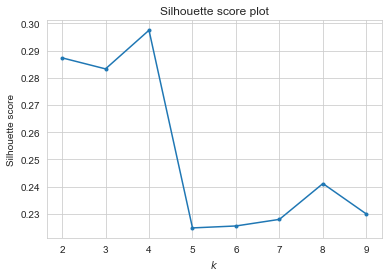

In [18]:
# Plot Silhouette score plot

from sklearn.metrics import silhouette_score
clusters = np.arange(2,10)
sil_score = []
for c in clusters:
    kmeans = KMeans(n_clusters = c, random_state=1)
    kmeans.fit(df_scaled)
    sil_score.append(silhouette_score(df_scaled, kmeans.labels_))

plt.plot(clusters, sil_score, marker= '.')
plt.title('Silhouette score plot')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show()

From the above plot, we can see that clusters 2, 3, and 4 are having high silhouette scores as compared to 5 onwards clusters.

### Silhouette Diagram - to check distribution of clusters

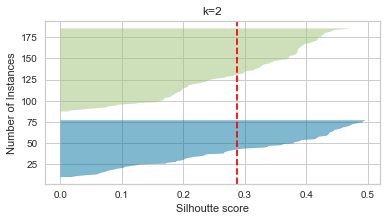

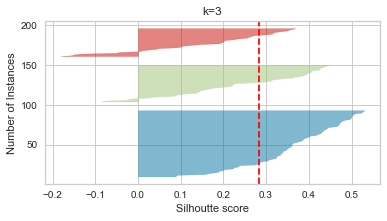

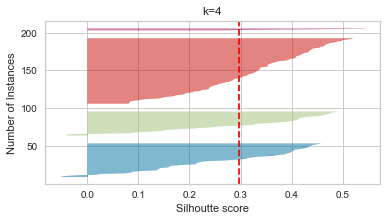

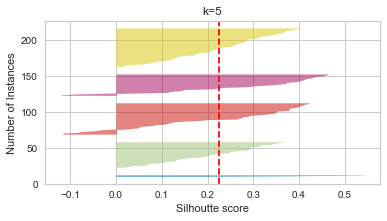

In [19]:
# Plot Silhouette Diagram

from yellowbrick.cluster import SilhouetteVisualizer

clusters = [2, 3, 4, 5]
for c in clusters:
    plt.figure(figsize=(6, 3))
    # Instantiate the clustering model and visualizer
    kmeans = KMeans(c, random_state=1)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    # Fit the data to the visualizer
    visualizer.fit(df_scaled);        
    plt.title("k={}".format(c))
    plt.xlabel("Silhoutte score")
    plt.ylabel("Number of Instances")
    plt.show()

Using the above plots, considering 3 as number of clusters for this dataset.

### KMeans Implementation

In [20]:
# Instantiate KMeans Model
model = KMeans(n_clusters= 3)

# Fit on dataset
model.fit(df_scaled)

# Predict labels
label = model.predict(df_scaled)

print(label)

[0 1 1 0 1 1 1 2 2 1 1 2 1 1 1 2 1 0 1 1 1 0 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 1 2 1 1 1 0 2
 2 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 0 2 1 0 1 1 1 1 1 2 2 1 1 0 1 1 0 1 1 0 2 2 2 1 0 2 2 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]


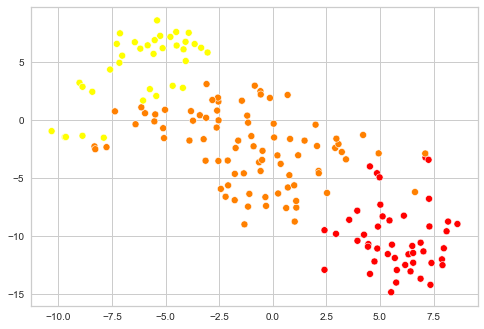

In [24]:
# Using t-SNE plot to visualize the clusters
sns.scatterplot(x= xs, y= ys, c= label, cmap='autumn')
plt.show()

In [25]:
# Adding label as new column to dataset
df['label'] = label
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


### To find which cluster will be in dire need of aid, considering the cluster which has high child mortality rate

In [26]:
# Separate dataset for each cluster

df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]
df_2 = df[df['label'] == 2]

In [27]:
df_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
country,,,,,,,,,,
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1
Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1


In [35]:
# Cluster having high child mortality rate
np.argmax([df_0['child_mort'].mean(),  df_1['child_mort'].mean(),  df_2['child_mort'].mean()])

0

In [36]:
# Cluster label 0 is our required dataframe
df_reqd = df_0.copy()

#### Can also sort the countries by life expectencies, Countries with lower life expec will are in much need of help

In [37]:
# Sort by life expectency
df_reqd.sort_values(by= 'life_expec', inplace= True)
df_reqd.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
country,,,,,,,,,,
Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0
Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,0
Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0
Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460,0
Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,0


### List of countries which are in direst need of aid

In [40]:
# Index of required dataframe
List = df_reqd.index
List

Index(['Haiti', 'Lesotho', 'Central African Republic', 'Zambia', 'Malawi',
       'South Africa', 'Mozambique', 'Sierra Leone', 'Guinea-Bissau',
       'Afghanistan', 'Cote d'Ivoire', 'Chad', 'Uganda', 'Botswana',
       'Cameroon', 'Congo, Dem. Rep.', 'Burundi', 'Burkina Faso', 'Guinea',
       'Namibia', 'Togo', 'Niger', 'Tanzania', 'Mali', 'Angola', 'Congo, Rep.',
       'Nigeria', 'Kiribati', 'Liberia', 'Madagascar', 'Equatorial Guinea',
       'Eritrea', 'Benin', 'Ghana', 'Kenya', 'Gabon', 'Lao', 'Senegal',
       'Rwanda', 'Pakistan', 'Gambia', 'Comoros', 'Sudan', 'Iraq', 'Yemen',
       'Mauritania', 'Timor-Leste'],
      dtype='object', name='country')